
## Momentum and Adam

This notebook demonstrates the implementation of a three-layer neural network and compares the performance of different optimization methods: Gradient Descent (GD), Momentum, and Adam. The neural network is trained on a two-moon-shaped dataset using various optimization techniques to find the optimal parameters that minimize the cost function and improve the accuracy of the model.

### Dataset
The dataset used in this notebook is generated using the `make_moons()` function from the `sklearn.datasets` module. The dataset consists of two classes that form two moon shapes. It is a non-linearly separable dataset, making it a suitable scenario for testing different optimization methods for training a neural network.

### Activation Functions
The neural network uses two activation functions:

1. **ReLU (Rectified Linear Unit)**: The ReLU activation function is used in the hidden layers of the neural network. It allows the model to handle non-linearities efficiently and avoids the vanishing gradient problem, which can occur with sigmoid activation.
2. **Sigmoid**: The sigmoid activation function is used in the output layer to compute the final probability of the binary classification task. It maps the input to the range (0, 1), representing the probability of the input belonging to class 1.

### Optimization Methods

#### 1. Gradient Descent (GD)
Gradient Descent is a first-order optimization algorithm that updates the model's parameters in the opposite direction of the gradient of the cost function. The magnitude of the update is controlled by the learning rate. While GD is a simple and intuitive optimization method, it may suffer from slow convergence, especially for large datasets or in cases where the cost function has high curvatures.

#### 2. Momentum
Momentum is an extension of GD that introduces a moving average of the gradients to accelerate convergence. It accumulates the past gradients' information to continue moving in the same direction even when the gradients change direction frequently. This helps in faster convergence and reduces oscillations in the cost function. The momentum hyperparameter controls the influence of the past gradients.

#### 3. Adam (Adaptive Moment Estimation)
Adam is a popular optimization algorithm that combines the ideas of both Momentum and RMSprop. It uses moving averages of the past gradients and squared gradients to adapt the learning rate for each parameter. The algorithm automatically adjusts the learning rate based on the history of the gradients and their magnitudes. This adaptive learning rate makes Adam robust and efficient in practice, requiring minimal hyperparameter tuning.

### Training and Evaluation
The neural network is trained using each of the three optimization methods. For each optimization method, the model's parameters are updated iteratively over a specified number of epochs using mini-batch gradient descent. At the end of each epoch, the cost function is computed and printed to monitor the training progress. The final trained model's accuracy on the training data is also calculated and displayed.


let's delve into the details and theory of each optimization method along with their advantages and disadvantages.

### 1. Gradient Descent (GD)

**Theory**:
Gradient Descent is a first-order optimization algorithm used to minimize the cost function of a neural network. It works by iteratively updating the model's parameters in the opposite direction of the gradient of the cost function with respect to those parameters. The gradient points in the direction of steepest ascent, so taking the opposite direction allows the algorithm to move towards the minimum of the cost function.

**Algorithm**:
1. Initialize the model's parameters randomly.
2. Compute the gradient of the cost function with respect to each parameter.
3. Update each parameter using the formula: `parameter = parameter - learning_rate * gradient`, where the learning_rate controls the size of the update step.

**Advantages**:
- Simple and easy to implement.
- Can be applied to large datasets since it processes one data point at a time.
- Can handle non-convex cost functions.

**Disadvantages**:
- Convergence can be slow, especially for large datasets or complex cost functions.
- Sensitive to the learning rate choice; a large learning rate may lead to overshooting the minimum, while a small learning rate may result in slow convergence.

### 2. Momentum

**Theory**:
Momentum is an extension of GD that aims to accelerate the convergence of the optimization process. It introduces a moving average of the past gradients to continue moving in the same direction even when the gradients change direction frequently. This helps to overcome oscillations in the cost function and speeds up convergence.

**Algorithm**:
1. Initialize the model's parameters and the velocity (initialized as zeros) for each parameter.
2. Compute the gradient of the cost function with respect to each parameter.
3. Update each parameter using the formula:
   ```
   velocity = beta * velocity + (1 - beta) * gradient
   parameter = parameter - learning_rate * velocity
   ```
   where `beta` is the momentum hyperparameter.

**Advantages**:
- Accelerates convergence, especially in areas with high curvature or noisy gradients.
- Reduces oscillations and overshooting, leading to more stable updates.

**Disadvantages**:
- Momentum may accumulate too much velocity in flat regions, making it harder to escape local minima.
- May overshoot and oscillate when the learning rate is too large.

### 3. Adam (Adaptive Moment Estimation)

**Theory**:
Adam is an adaptive learning rate optimization algorithm that combines the ideas of both Momentum and RMSprop. It uses moving averages of the past gradients and squared gradients to adapt the learning rate for each parameter. The algorithm automatically adjusts the learning rate based on the history of the gradients and their magnitudes.

**Algorithm**:
1. Initialize the model's parameters and the first and second moment estimates (initialized as zeros) for each parameter.
2. Compute the gradient of the cost function with respect to each parameter.
3. Update each parameter using the formula:
   ```
   first_moment = beta1 * first_moment + (1 - beta1) * gradient
   second_moment = beta2 * second_moment + (1 - beta2) * gradient^2
   first_moment_corrected = first_moment / (1 - beta1^t)
   second_moment_corrected = second_moment / (1 - beta2^t)
   parameter = parameter - learning_rate * first_moment_corrected / sqrt(second_moment_corrected + epsilon)
   ```
   where `beta1` and `beta2` are the moment hyperparameters, and `epsilon` is a small constant to prevent division by zero.

**Advantages**:
- Adaptive learning rate for each parameter, reducing the need for extensive learning rate tuning.
- Efficient and robust in practice, suitable for a wide range of neural network architectures and cost functions.
- Fast convergence and good generalization on various datasets.

**Disadvantages**:
- Adam may exhibit slow convergence on certain non-stationary objectives or saddle points.
- Requires more memory to store the additional moving average parameters.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import h5py 
import scipy.io 
import sklearn 
import sklearn.datasets
from momentum_adam_helpers import *


### Mini-Batch Gradient Descent

In this section, we will explore the process of creating mini-batches from the training dataset and examine their shapes to ensure that the mini-batch creation process is working correctly.

First, we load the dataset and create mini-batches using the `random_mini_batches` function with a mini-batch size of 128. We then print the shapes of the training data and the first three mini-batches to verify their correctness.


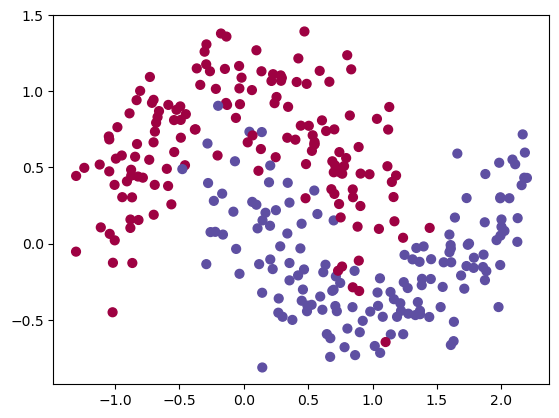

In [2]:
train_X, train_Y = load_dataset() #Loads the training dataset.

In [3]:
mini_batches = random_mini_batches(train_X, train_Y, mini_batch_size = 128 ) # Creates mini-batches from the training dataset with a specified mini-batch size.
print ("shape of the X_train is " , np.shape (train_X)) # shape of the training data.
print("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape)) # shape of the first mini-batch's input data.
print("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape)) # shape of the second mini-batch's input data.
print("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape)) # shape of the third mini-batch's input data.
print("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape)) # shape of the first mini-batch's output data.
print("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) # shape of the second mini-batch's output data.
print("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape)) # shape of the third mini-batch's output data.
print("mini batch sanity check: " + str(mini_batches[0][0][0][0:3])) # sanity check for the first mini-batch's input data.

shape of the X_train is  (2, 300)
shape of the 1st mini_batch_X: (2, 128)
shape of the 2nd mini_batch_X: (2, 128)
shape of the 3rd mini_batch_X: (2, 44)
shape of the 1st mini_batch_Y: (1, 128)
shape of the 2nd mini_batch_Y: (1, 128)
shape of the 3rd mini_batch_Y: (1, 44)
mini batch sanity check: [-0.14656235  0.22452308  1.38239247]


## Momentum


Momentum is an optimization technique that helps accelerate the convergence of gradient descent algorithms by adding a fraction of the previous update to the current update. This method is designed to overcome the limitations of standard gradient descent, such as slow convergence and oscillations in the cost function.

#### Theory

Momentum works by maintaining a moving average of the gradients, which helps the algorithm to continue moving in the same direction even when the gradients change direction frequently. This moving average is controlled by a hyperparameter called the momentum coefficient (usually denoted as `beta`), which determines the influence of the past gradients on the current update.

#### Algorithm

1. **Initialize** the model's parameters and the velocity (initialized as zeros) for each parameter.
2. **Compute** the gradient of the cost function with respect to each parameter.
3. **Update** each parameter using the following formulas:
    ```
    velocity = beta * velocity + (1 - beta) * gradient
    parameter = parameter - learning_rate * velocity
    ```
    where `beta` is the momentum hyperparameter.

#### Advantages

- **Accelerates convergence**: Momentum helps to speed up the convergence of the optimization process, especially in areas with high curvature or noisy gradients.
- **Reduces oscillations**: By smoothing the updates, momentum reduces oscillations and overshooting, leading to more stable updates.

#### Disadvantages

- **Accumulation of velocity**: In flat regions, momentum may accumulate too much velocity, making it harder to escape local minima.
- **Overshooting and oscillation**: When the learning rate is too large, momentum may cause overshooting and oscillation around the minimum.

Momentum is a powerful technique that can significantly improve the performance of gradient descent algorithms, especially in scenarios where the cost function has high curvature or noisy gradients. By carefully tuning the momentum coefficient, it is possible to achieve faster and more stable convergence.

In [4]:
def initialize_velocity(parameters):
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
    return v

In [5]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate) :

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        # compute velocities
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        # update parameters
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v["db" + str(l + 1)]
        
    return parameters, v

 ## ADAM Optimizer 

Adam (short for Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other popular methods: AdaGrad and RMSProp. It is widely used for training deep learning models due to its efficiency and effectiveness.

## Key Concepts

1. **Adaptive Learning Rates**: Adam computes adaptive learning rates for each parameter. This means that each parameter has its own learning rate, which can change over time.

2. **Momentum**: Adam uses the concept of momentum to accelerate the gradient vectors in the right directions, leading to faster converging.

3. **Bias Correction**: Adam includes bias correction to counteract the initial bias in the moment estimates, which helps in achieving more accurate updates.

## Algorithm Steps

1. **Initialize Parameters**:
  - Learning rate $\alpha$
  - Exponential decay rates for the moment estimates $\beta_1$ and $\beta_2$
  - Small constant $\epsilon$ to prevent division by zero
  - Initialize first moment vector $m_t$ and second moment vector $v_t$ to zero

2. **Update Rule**:
  - Compute the gradients $g_t$ of the loss function with respect to the parameters
  - Update biased first moment estimate:
    $$
    m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
    $$
  - Update biased second moment estimate:
    $$
    v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
    $$
  - Compute bias-corrected first moment estimate:
    $$
    \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
    $$
  - Compute bias-corrected second moment estimate:
    $$
    \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
    $$
  - Update parameters:
    $$
    \theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
    $$

## Advantages

- **Efficient Computation**: Adam is computationally efficient and has low memory requirements.
- **Invariance to Diagonal Rescaling**: The algorithm is invariant to diagonal rescaling of the gradients, which makes it suitable for problems with large gradients.
- **Robustness**: Adam works well in practice and is robust to noisy gradients and sparse gradients.

## Common Hyperparameters

- Learning rate $\alpha$: Typically set to 0.001
- $\beta_1$: Typically set to 0.9
- $\beta_2$: Typically set to 0.999
- $\epsilon$: Typically set to $10^{-8}$

In [6]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    
    return v, s

In [7]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s["dW" + str(l + 1)] + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s["db" + str(l + 1)] + epsilon)

    return parameters, v, s

Cost after epoch 0: 0.776085
Cost after epoch 1000: 0.709262
Cost after epoch 2000: 0.663615
Cost after epoch 3000: 0.663728
Cost after epoch 4000: 0.597440
Cost after epoch 5000: 0.507172
Cost after epoch 6000: 0.487885
Cost after epoch 7000: 0.346078
Cost after epoch 8000: 0.372416
Cost after epoch 9000: 0.498869


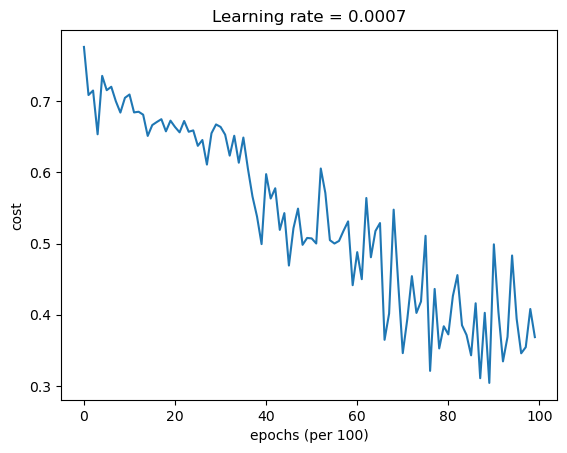

Accuracy: 0.85


In [8]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer="gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

Cost after epoch 0: 0.776325
Cost after epoch 1000: 0.709252
Cost after epoch 2000: 0.663705
Cost after epoch 3000: 0.663868
Cost after epoch 4000: 0.597699
Cost after epoch 5000: 0.507593
Cost after epoch 6000: 0.488211
Cost after epoch 7000: 0.346261
Cost after epoch 8000: 0.372549
Cost after epoch 9000: 0.498889


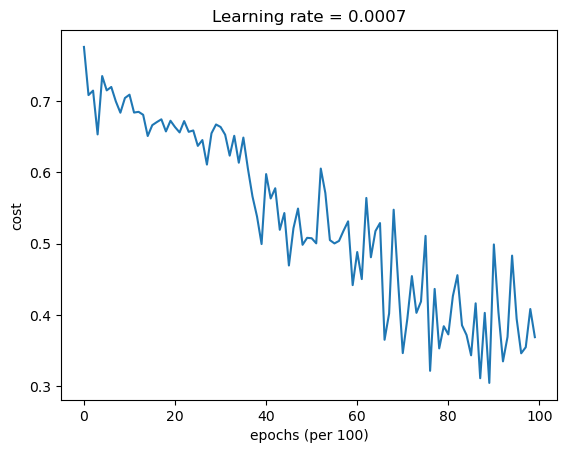

Accuracy: 0.85


In [9]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta=0.9, optimizer="momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

Cost after epoch 0: 0.706337
Cost after epoch 1000: 0.173407
Cost after epoch 2000: 0.191965
Cost after epoch 3000: 0.049790
Cost after epoch 4000: 0.147109
Cost after epoch 5000: 0.108286
Cost after epoch 6000: 0.122491
Cost after epoch 7000: 0.028581
Cost after epoch 8000: 0.131736
Cost after epoch 9000: 0.159093


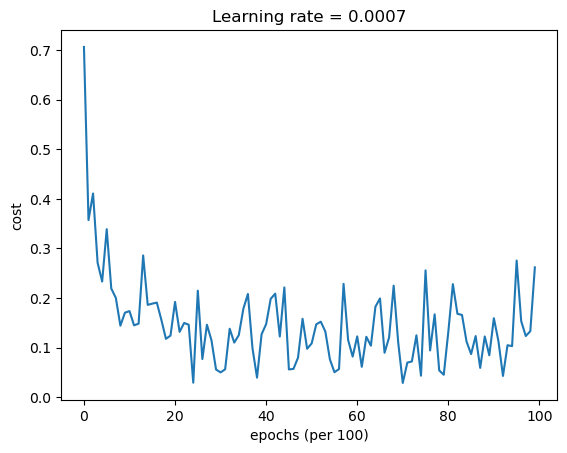

Accuracy: 0.9433333333333334


In [10]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer="adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

### Conclusion
The notebook provides an insight into the effectiveness of different optimization methods in training neural networks. By comparing the performance of GD, Momentum, and Adam, we can gain a better understanding of how these algorithms handle the optimization process and improve the neural network's convergence and accuracy on non-linear datasets like the two-moon-shaped dataset used here.

Each optimization method has its strengths and weaknesses, and the choice of the optimization algorithm may depend on the specific problem, dataset, and neural network architecture. While Gradient Descent is a simple baseline algorithm, Momentum and Adam often offer faster convergence and more stable updates in practice. However, Adam may require more memory due to the additional moving average parameters.

It is recommended to experiment with different optimization methods and hyperparameter values to find the optimal combination that yields the best convergence and accuracy for a given neural network task. Additionally, other optimization techniques, such as Adagrad, RMSprop, and Nesterov Accelerated Gradient (NAG), are also widely used in practice and may be worth exploring for specific scenarios.